# This notebook is ML project for personal practice

## copyright : Sang Wook Kim 2022

In [73]:
# Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.3f}".format

print("Imported modules.")

Imported modules.


In [2]:
# Import database. Since this is practice, I will look a whole dataset first.
base_df = pd.read_csv("./database/IKEA/IKEA_SA_Furniture_Web_Scrapings_sss.csv")
base_df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.000,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,nan,99.000,51.000
1,1,368814,NORDVIKEN,Bar furniture,995.000,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,nan,105.000,80.000
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.000,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,nan,nan,nan
3,3,80155205,STIG,Bar furniture,69.000,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.000,100.000,60.000
4,4,30180504,NORBERG,Bar furniture,225.000,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.000,43.000,74.000


In [3]:
base_df.shape

(3694, 14)

In [4]:
# replace nan to empty string 
copy_df = base_df.replace(np.nan, '', regex=True)

In [5]:
# find the rows with empty string in depth, height, width
i_no_dim = []
for i in range(copy_df.shape[0]):
    if copy_df['depth'].iloc[i] == '' or copy_df['height'].iloc[i] == '' or copy_df['width'].iloc[i] == '':
        i_no_dim.append(i)
print(len(i_no_dim))

1795


In [6]:
# see if I can fill them with description
i_dim_included = []
for i in i_no_dim:
    if 'cm' in copy_df['short_description'].iloc[i]:
        i_dim_included.append(i)
print(len(i_dim_included))

1213


In [7]:
# look the rows
copy_df[['short_description','depth','height','width']].iloc[i_dim_included]

,short_description,depth,height,width
0,"Bar table, in/outdoor, 51x51 cm",,99.000,51.000
1,"Bar table, 140x80 cm",,105.000,80.000
7,"Bar stool, 63-74 cm",50.000,,50.000
15,"Table, 130x70/105 cm",,105.000,70.000
20,"Bar table, 120x80 cm",,105.000,80.000
...,...,...,...,...
3689,"1 section, 92x51x222-350 cm",50.000,,91.000
3690,"2 sections, 135x51x222-350 cm",50.000,,135.000
3691,"2 sections, 175x51x222-350 cm",50.000,,175.000
3692,"3 sections, 178x51x222-350 cm",50.000,,178.000


In [12]:
# fill them if I can
def spliter(x):
    layer1 = x.split(',')[-1]
    if 'cm' in layer1:
        layer1 = layer1[:layer1.index('cm')]
        layer2 = layer1.split('x')
        if len(layer2) == 2:
            try:
                d, w = float(layer2[0]), float(layer2[1])
                h = 0
                return d, w, h
            except:
                return 0, 0, 0
        elif len(layer2) == 3:
            layer2[2] = layer2[2][:layer2[2].find('-')]
            try:
                d, w, h = float(layer2[0]), float(layer2[1]), float(layer2[2])
                return d, w, h
            except:
                return 0, 0, 0
        else:
            return 0, 0, 0
    else:
        return 0, 0, 0


In [20]:
# making list of them
reading = [spliter(dscrp) for dscrp in copy_df['short_description'].iloc[i_dim_included]]

In [21]:
for i in range(len(i_dim_included)):
    if reading[i][0]:
        base_df['depth'].iloc[i_dim_included[i]] = reading[i][0]
    if reading[i][1]:
        base_df['width'].iloc[i_dim_included[i]] = reading[i][1]
    if reading[i][2]:
        base_df['height'].iloc[i_dim_included[i]] = reading[i][2]

base_df.head()

/home/sang/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.000,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,51.000,99.000,51.000
1,1,368814,NORDVIKEN,Bar furniture,995.000,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,140.000,105.000,80.000
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.000,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,nan,nan,nan
3,3,80155205,STIG,Bar furniture,69.000,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.000,100.000,60.000
4,4,30180504,NORBERG,Bar furniture,225.000,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.000,43.000,74.000


In [22]:
# check if it worked
base_df[['short_description','depth','height','width']].iloc[i_dim_included]

,short_description,depth,height,width
0,"Bar table, in/outdoor, 51x51 cm",51.000,99.000,51.000
1,"Bar table, 140x80 cm",140.000,105.000,80.000
7,"Bar stool, 63-74 cm",50.000,nan,50.000
15,"Table, 130x70/105 cm",nan,105.000,70.000
20,"Bar table, 120x80 cm",120.000,105.000,80.000
...,...,...,...,...
3689,"1 section, 92x51x222-350 cm",92.000,222.000,51.000
3690,"2 sections, 135x51x222-350 cm",135.000,222.000,51.000
3691,"2 sections, 175x51x222-350 cm",175.000,222.000,51.000
3692,"3 sections, 178x51x222-350 cm",178.000,222.000,51.000


In [23]:
# Now we don't need the copy_df and replace it with clean df
copy_df = base_df.dropna()

In [24]:
# Are there any unexpected values?
print(set(copy_df['sellable_online']), set(copy_df['other_colors']))

{False, True} {'Yes', 'No'}


In [33]:
# divide them into categorical, numerical df
# I don't want to use 'old_price'
df_cate = copy_df[['name', 'category', 'sellable_online', 'other_colors', 'short_description', 'designer']]
df_nume = copy_df[['depth', 'height', 'width', 'price']]

In [29]:
print(
    '# of unique values for name', len(df_cate['name'].unique()) , '\n',
    '# of unique values for category', len(df_cate['category'].unique()) , '\n',
    '# of unique values for designer', len(df_cate['designer'].unique()) , '\n',)

# of unique values for name 404 
 # of unique values for category 17 
 # of unique values for designer 260 



In [36]:
# 1 for True & Yes, 0 for False & No
df_cate['sellable_online'] = df_cate['sellable_online'].apply(lambda x: 1 if x == True else 0)
df_cate['other_colors'] = df_cate['other_colors'].apply(lambda x: 1 if x == 'Yes' else 0)

<ipython-input-36-4d5ee3b1bdce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cate['sellable_online'] = df_cate['sellable_online'].apply(lambda x: 1 if x == True else 0)
<ipython-input-36-4d5ee3b1bdce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cate['other_colors'] = df_cate['other_colors'].apply(lambda x: 1 if x == 'Yes' else 0)


In [88]:
target_df = df_cate[['name','category','designer']].join(df_nume)
target_df.head()

,name,category,designer,depth,height,width,price
0,FREKVENS,Bar furniture,Nicholai Wiig Hansen,51.000,99.000,51.000,265.000
1,NORDVIKEN,Bar furniture,Francis Cayouette,140.000,105.000,80.000,995.000
3,STIG,Bar furniture,Henrik Preutz,50.000,100.000,60.000,69.000
4,NORBERG,Bar furniture,Marcus Arvonen,60.000,43.000,74.000,225.000
5,INGOLF,Bar furniture,Carina Bengs,45.000,91.000,40.000,345.000


In [89]:
# For facets
from IPython.core.display import display, HTML
import base64
# !pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

# Visualize the Data in Facets
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': target_df, 'name': 'Data'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

<AxesSubplot:>

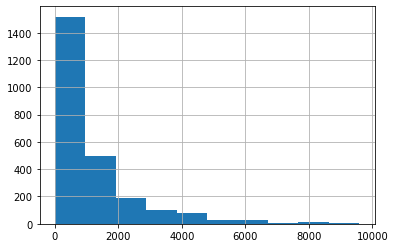

In [90]:
target_df['price'].hist()

count   2462.000
mean       6.375
std        1.274
min        1.609
25%        5.541
50%        6.412
75%        7.325
max        9.168
Name: price, dtype: float64

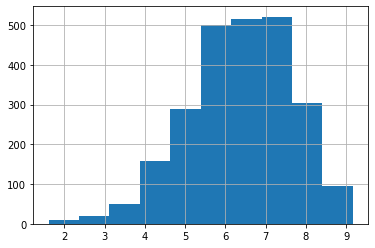

In [91]:
# Is log(price) useful?
import math
logprice = target_df['price'].apply(lambda x: math.log(x))
logprice.hist()
logprice.describe()

### Is the volume of item related to price?

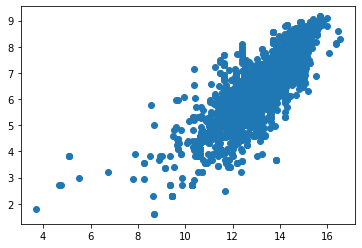

In [52]:
import math
vol = target_df['depth']*target_df['height']*target_df['width']
logvol = vol.apply(lambda x: math.log(x))
plt.scatter(logvol,logprice)

In [61]:
twofactor = pd.DataFrame({'logvol': logvol, 'logprice': logprice})
twofactor.corr()

,logvol,logprice
logvol,1.000,0.819
logprice,0.819,1.000


### highly corrrelated

## Create data array

In [94]:
target_df2 = target_df.drop('price', axis = 1).join(logprice)
target_df2

,name,category,designer,depth,height,width,price
0,FREKVENS,Bar furniture,Nicholai Wiig Hansen,51.000,99.000,51.000,5.580
1,NORDVIKEN,Bar furniture,Francis Cayouette,140.000,105.000,80.000,6.903
3,STIG,Bar furniture,Henrik Preutz,50.000,100.000,60.000,4.234
4,NORBERG,Bar furniture,Marcus Arvonen,60.000,43.000,74.000,5.416
5,INGOLF,Bar furniture,Carina Bengs,45.000,91.000,40.000,5.844
...,...,...,...,...,...,...,...
3689,ELVARLI,Wardrobes,Ehlén Johansson,92.000,222.000,51.000,6.620
3690,ELVARLI,Wardrobes,Ehlén Johansson,135.000,222.000,51.000,7.360
3691,ELVARLI,Wardrobes,Ehlén Johansson,175.000,222.000,51.000,6.829
3692,ELVARLI,Wardrobes,Ehlén Johansson,178.000,222.000,51.000,7.918


In [95]:
def pandas_to_numpy(data):
    '''Convert a pandas DataFrame into a Numpy array'''
    # Drop empty rows.
    data = data.dropna(how="any", axis=0)

    # Separate DataFrame into two Numpy arrays"
    labels = np.array(data['price'])
    features = data.drop('price', axis=1)
    features = {name:np.array(value) for name, value in features.items()}

    return features, labels

In [96]:
# Creating a train data with 70% of original dataframe
df_train = target_df2.sample(frac = 0.7)
 
# Creating a test data with the rest of the 30%
df_test = target_df2.drop(df_train.index)

print(len(df_train), len(df_test))

1723 739


## build model

In [81]:
# Define the functions that build and train a model
def build_model(feature_layer, lr):
    # Discard any pre-existing version of the model.
    model = None
    
    # Most simple tf.keras models are sequential. 
    model = keras.Sequential()
    model.add(layers.DenseFeatures(feature_layer))
    model.add(layers.Dense(20, activation="relu", name='Hidden1'))
    model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(10, activation="relu", name='Hidden2'))
    model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1, activation="relu", name='Output'))
    
    # Compile the model topography
    # Configure training to minimize the model's mean squared error. 
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model 

In [99]:
def train_model(model, dataset, epochs, label_name,
                batch_size=None):

    # Split the dataset into features and label.
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True) 

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # To track the progression of training, gather a snapshot
    # of the model's mean squared error at each epoch. 
    hist = pd.DataFrame(history.history)

    return epochs, hist

In [78]:
category_list = copy_df['category'].unique()

In [83]:
# define features

name = tf.feature_column.categorical_column_with_hash_bucket(
    "name", hash_bucket_size=200)
designer = tf.feature_column.categorical_column_with_hash_bucket(
    "designer", hash_bucket_size=260)
category = tf.feature_column.categorical_column_with_vocabulary_list(
    "category", category_list)

depth = tf.feature_column.numeric_column("depth")
height = tf.feature_column.numeric_column("height")
width = tf.feature_column.numeric_column("width")

deep_columns = [
    tf.feature_column.embedding_column(name, dimension=9),
    tf.feature_column.embedding_column(designer, dimension=6),
    tf.feature_column.embedding_column(category, dimension=3),
    depth,
    height,
    width
]

In [100]:
# The following variables are the hyperparameters.
learning_rate = 0.007
epochs = 30
batch_size = 10

label_name = "price"

# Establish the model's topography.
my_model = build_model(deep_columns, learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, df_train, epochs, 
                          label_name, batch_size)
# plot_the_loss_curve(epochs, mse)

Epoch 1/30
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
173/173 [==============================] - 1s 680us/step - loss: 46.6181 - root_mean_squared_error: 6.8277
Epoch 2/30
173/173 [==============================] - 0s 677us/step - loss: 35.0194 - root_mean_squared_error: 5.9177
Epoch 3/30
173/173 [==============================] - 0s 687us/step - loss: 28.5041 - root_mean_squared_error: 5.3389
Epoch 4/30
173/173 [==============================] - 0s 717us/step - loss: 10.4993 - root_mean_squared_error: 3.2403
Epoch 5/30
173/173 [==============================] - 0s 700us/step - loss: 3.5121 - root_mean_squared_error: 1.8741
Epoch 6/30
173/173 [==============================] - 0s 695us/step - loss: 2.1645 - root_mean_squared_error: 1.4712
Epoch 7/30
173/173 [==============================] - 0s 692us/step - loss: 1.5254 - root_mean_squared_error: 1.2351
Epoch 8/30
173/173 [==============================] - 0s 702us/step

## Plot the loss, evaluate model, compare predicted vaules

In [102]:
def plot_the_loss_curve(epochs, hist):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("rmse")
    rmse = hist['root_mean_squared_error']
    plt.plot(epochs, rmse, label="rmse")
    plt.legend()
    plt.ylim([rmse.min()*0.95, rmse.max() * 1.03])
    plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


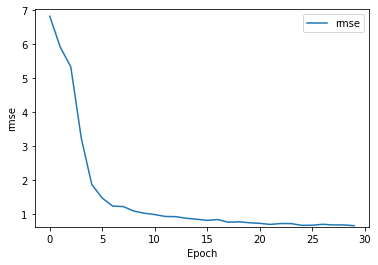

In [103]:
plot_the_loss_curve(epochs, hist)

In [104]:
test_features, test_label = pandas_to_numpy(df_test)
# test_features = {name:np.array(value) for name, value in test_df_norm.items()}
# test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size) 


 Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
74/74 [==============================] - 0s 543us/step - loss: 0.3969 - root_mean_squared_error: 0.6300


[0.3969099223613739, 0.6300078630447388]

In [106]:
predicted_values = my_model.predict_on_batch(x=test_features)

Consider rewriting this model with the Functional API.


In [107]:
import math
print("label          predicted")
print("value          value")
print("in original   in original")
print("--------------------------------------")

for i in range(30):
    print ("%6.0f %15.0f" % ( math.exp(test_label[i]),
                                   math.exp(predicted_values[i][0]) ))

label          predicted
value          value
in original   in original
--------------------------------------
   225             220
   345             433
   129             167
   395             468
   345             466
   595             339
   149             167
   796             629
   395             439
   895             678
   545            2131
  1729            1273
   745            1984
   295            1125
   570             605
   895            1150
   480            1033
   695             652
   745             809
   295             851
   620             548
  2425            1724
  2185             602
  1195             655
  3339             832
  1260             542
  1445             960
   849             976
  2905             659
  1400            3171
